# Analyze oscillations
Characterize relationship between oscillation measure across electrodes

## Set-up

### Imports

In [22]:
# imports - general
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# imports - custom
import sys
sys.path.append("../code")
from info import FS, N_CHANNELS
from settings import COLORS

# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Settings

In [45]:
# set plot style
plt.style.use('../mplstyle/default.mplstyle')


## Main

### correlate power measures at each frequency

In [43]:
# load example data

i_file = 0

# load data
dir_input = "../data/tfr"
files = os.listdir(dir_input)
data = np.load(f"{dir_input}/{files[i_file]}")
tfr = data["tfr"]
freq = data["freq"]
time = data["time"]

# decimate
# tfr = tfr[:, :, ::100]
# time = time[::100]

print(f"tfr.shape = {tfr.shape}")
print(f"freq.shape = {freq.shape}")
print(f"time.shape = {time.shape}")

tfr.shape = (7, 128, 213959)
freq.shape = (128,)
time.shape = (213959,)


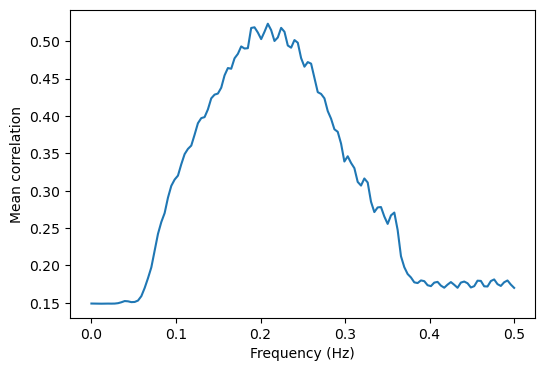

In [44]:
# correlate power across channels, for each frequency

# compute corr
n_f = freq.size
n_c = N_CHANNELS
corr = np.zeros((n_f, n_c, n_c))
for i_f in range(n_f):
    tfr_f = tfr[:, i_f, :]
    corr[i_f] = np.corrcoef(tfr_f)
mean_corr = np.mean(corr, axis=(1,2))

# plot
fig, ax = plt.subplots(1,1, figsize=[6,4])
ax.plot(freq, mean_corr)
ax.set(xlabel="Frequency (Hz)", ylabel="Mean correlation")
ax.set_title("")
plt.show()

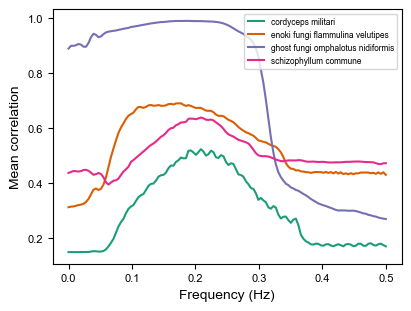

In [49]:
# correlate power across channels, for each frequency, for all files

# init
fig, ax = plt.subplots(1,1, figsize=[4,3])
temp = np.load(f"{dir_input}/{files[0]}")
mean_corr = np.zeros((len(files), len(temp['freq'])))

# loop over files
dir_input = "../data/tfr"
files = os.listdir(dir_input)
for i_file, fname in enumerate(files):

    # load data
    data = np.load(f"{dir_input}/{fname}")
    tfr = data["tfr"]
    freq = data["freq"]

    # compute corr
    n_freqs = len(freq)
    corr = np.zeros((n_freqs, N_CHANNELS, N_CHANNELS))
    for i_f in range(n_freqs):
        corr[i_f] = np.corrcoef(tfr[:, i_f, :])
    mean_corr[i_file] = np.mean(corr, axis=(1,2))

    # plot
    ax.plot(freq, mean_corr[i_file], COLORS[i_file],
            label=fname.split(".")[0].replace("_", " "))

# label and save
ax.set(xlabel="Frequency (Hz)", ylabel="Mean correlation")
ax.legend()
ax.set_title("")
plt.savefig(f"../figures/misc/power_correlation.png")
plt.show()

In [38]:
# print frequency of max power correlation for each species
for i_file, fname in enumerate(files):
    f_max = freq[np.argmax(mean_corr[i_file])]
    print(f"\n{fname.split('.')[0][:18]}...: \t{f_max:0.3f} Hz")


cordyceps_militari...: 	0.209 Hz

enoki_fungi_flammu...: 	0.177 Hz

ghost_fungi_omphal...: 	0.185 Hz

schizophyllum_comm...: 	0.209 Hz
